<h1 align=center><font size = 6>Capstone Project - The Battle of Neighborhoods</font></h1>

<h1 align=center><font size = 5>Finding a good location to open an Italian restaurant in Berlin, Germany</font></h1>


### Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a>

2. <a href="#item2">Data Description</a>

3. <a href="#item3">Methodology</a>

4. <a href="#item4">Results</a>

5. <a href="#item5">Discussion</a>
    
6. <a href="#item6">Conclusion</a> 
    
<a href="#item7">References</a> 
</font>
</div>

## 1. Introduction

### Background

Berlin is the capital and largest city of Germany by both area (30,000 sq. km) and population (ca. 3.8 million).

Being world city of culture, politics, media and science, Berlin attracts many tourists all year round. In 2014, the city recorded 28.7 million overnight hotel stays and 11.9 million hotel guests. Moreover, tourism figures have more than doubled within the last ten years and Berlin has become the third most visited city destination in Europe. The largest visitor groups are from Germany, the United Kingdom, the Netherlands, Italy, Spain and the United States. 

Additionally, in 2019, Berlin was ranked 13th in the Quality of living city ranking prepared by Mercer. 


### Problem

Being a well known cosmopolitan city with people from all around the world, Berlin offers a wide variety in the gastronomy sector, especially Italian restaurants, with new ones are opening all the time.

Searching for an optimal location to open an Italian restaurant in Berlin, however, could be challenging. Although it is logical to think that locations where there are no Italian restaurants, or at least not many of them, would be better, the problem is that interested customers tend to prefer popular and busy neighborhoods with many options available to choose from for them. From an investor point of view, on the one hand that means more movement of people and therefore more customers, but on the other, higher rents and stronger competition. 

### Interest

To analyze locations, ratings, and competition is a plus for those who want to be part of this industry. Therefore, the project would be perfect fit for investors who wants to open a new Italian restaurant in the city of Berlin.

## 2. Data Description

To help solving the problem of finding the optimal location for a new Italian restaurant, the following data will be searched for and considered during the project:  
$\;\;\;\;\;\;$a) Number of already existing Italian restaurants in a given borough;  
$\;\;\;\;\;\;$b) Different boroughs and their respective average rental prices to open a restaurant;  
  
Additionally, the tools that will be used in this project are:    
$\;\;\;\;\;\;$a) Foursquare API to select the number of Italian restaurants and their respective location in any given borough in Berlin;  
$\;\;\;\;\;\;$b) Geocoder to get the latitudes and longitudes of places of interest. 

## 3. Methodology

The following lines import all the necessary libraries for the project. 

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INS

In [6]:
# Defining Berlin's coordinates
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Berlin are 52.5170365, 13.3888599.


In [7]:
# Defining Foursquare credentials and version
CLIENT_ID = '0NAAGZ5AGU2IZIL2VMC3T1FKQLOI4UI1YGIKR0BX2CHMZERX' 
CLIENT_SECRET = 'HY0UMFVBCHVQ2HKLBHHEUDL5JBGAVQAB3MTABZA032S55GIQ'
VERSION = '20200513'
LIMIT = 2000
radius = 15000
category = '55a5a1ebe4b013909087cb7f' #Italian restaurant
print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 0NAAGZ5AGU2IZIL2VMC3T1FKQLOI4UI1YGIKR0BX2CHMZERX
CLIENT_SECRET:HY0UMFVBCHVQ2HKLBHHEUDL5JBGAVQAB3MTABZA032S55GIQ


In [8]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
 CLIENT_ID, 
   CLIENT_SECRET, 
    VERSION, 
   latitude, 
   longitude, 
    category,
      radius, 
    LIMIT)

In [9]:
results = requests.get(url).json()
results.values();

In [10]:
results

{'meta': {'code': 200, 'requestId': '5ec25ed89c6f59001c09bb23'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Berlin',
  'headerFullLocation': 'Berlin',
  'headerLocationGranularity': 'city',
  'query': 'trattoria osteria',
  'totalResults': 104,
  'suggestedBounds': {'ne': {'lat': 52.65203663500014,
    'lng': 13.610293633523707},
   'sw': {'lat': 52.38203636499987, 'lng': 13.167426166476293}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56bf2966cd1043d2f2179233',
       'name': 'Mani in pasta',
       'location': {'address': 'Eisenbahnstr. 42-43',
        'lat': 52.502166846709024,
        'lng': 13.431716511155079,
        'labeledLatLngs': [{'label': 'display',
         

In [11]:
venues = results['response']['groups'][0]['items']
venues_neighborhood = [results['response']['groups'][0]['items'][n]['venue']['location']['formattedAddress'] for n in range(len(venues))]  

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
def get_venues(lat,lng):
    
    CLIENT_ID = '0NAAGZ5AGU2IZIL2VMC3T1FKQLOI4UI1YGIKR0BX2CHMZERX' 
    CLIENT_SECRET = 'HY0UMFVBCHVQ2HKLBHHEUDL5JBGAVQAB3MTABZA032S55GIQ'
    VERSION = '20200513'
    LIMIT = 2000
    radius = 15000
    category = '55a5a1ebe4b013909087cb7f' # Tratorias
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
     CLIENT_ID, 
       CLIENT_SECRET, 
        VERSION, 
       latitude, 
       longitude, 
        category,
          radius, 
        LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_lat=row['venue']['location']['lat']
            venue_lng=row['venue']['location']['lng']
            venue_code=row['venue']['location']['postalCode']
            venue_details.append([venue_id,venue_name,venue_category, venue_lat, venue_lng, venue_code])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category', 'Latitude', 'Longitude', 'Postal Code']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [14]:
df = get_venues(latitude, longitude)

done


In [15]:
df.head()

ID               Name           Category   Latitude  \
0  56bf2966cd1043d2f2179233      Mani in pasta  Trattoria/Osteria  52.502167   
1  5919dd9c6e465058f788753e       Esse Osteria  Trattoria/Osteria  52.535791   
2  4bc0c28ff8219c748f22b210  Osteria Ribaltone  Trattoria/Osteria  52.496061   
3  52c4840d11d221d9ea8d6277      Trattoria Zoe  Trattoria/Osteria  52.541842   
4  5057650de4b0d070fdec8fe0        Amici Amici  Trattoria/Osteria  52.492960   

   Longitude Postal Code  
0  13.431717       10997  
1  13.422438       10405  
2  13.342587       10777  
3  13.423225       10437  
4  13.387429       10961

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           92 non-null     object 
 1   Name         92 non-null     object 
 2   Category     92 non-null     object 
 3   Latitude     92 non-null     float64
 4   Longitude    92 non-null     float64
 5   Postal Code  92 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.4+ KB


In [17]:
# Berlin Map
berlin_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [18]:
# geojson file
berlin_geo = r'bezirksgrenzen.geojson'

In [19]:
# add markers to map
for lat, lng, restaurant, category in zip(df['Latitude'], df['Longitude'], df['Name'], df['Category']):
    label = '{}, {}'.format(restaurant, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(berlin_map)  
    
berlin_map

In [20]:
folium.GeoJson(berlin_geo).add_to(berlin_map)

In [21]:
berlin_map

In [22]:
df2 = df['Postal Code'].value_counts()

In [23]:
#df2 = pd.DataFrame(df2, index='Postal Code')
#df2.head()

In [31]:
df2 = df['Postal Code'].value_counts().rename_axis('Postal Code').reset_index(name='counts')
df2


Postal Code  counts
0        14057       5
1        14059       5
2        10437       4
3        10623       3
4        10178       3
5        10117       3
6        14193       3
7        10777       3
8        10243       3
9        13597       2
10       10969       2
11       10961       2
12       10715       2
13       10627       2
14       10709       2
15       10405       2
16       10965       2
17       10435       2
18       13437       2
19       13353       2
20       10997       2
21       10823       2
22       12159       2
23       12165       2
24       12047       1
25       12057       1
26       10785       1
27       10559       1
28       12489       1
29       10787       1
30       10707       1
31       12167       1
32       12157       1
33       13409       1
34       12205       1
35       10719       1
36       14195       1
37       10585       1
38       13403       1
39       10999       1
40       10555       1
41       10781       1
42       10119       1
43       10963       1
44       10247       1
45       10115       1
46       13187       1
47       14197       1
48       13156       1
49       10245       1
50       12099       1
51       10629       1
52       12169       1
53       10711       1

In [32]:
berlin_geo2 = r'plz.geojson'

In [33]:
df_top5 = df2.head()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

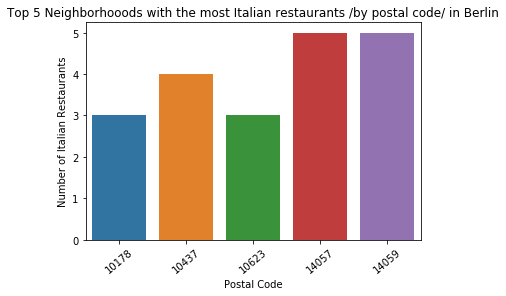

In [35]:
fig = sns.barplot(df_top5['Postal Code'],df_top5['counts'])
plt.title("Top 5 Neighborhooods with the most Italian restaurants /by postal code/ in Berlin")
plt.xlabel("Postal Code")
plt.xticks(rotation=40)
plt.ylabel("Number of Italian Restaurants")
plt.savefig("topten_df",bbox_inches="tight")
plt.show(fig)

In [44]:
m = folium.Map(location=[latitude, longitude], 
                    zoom_start=10)
choropleth = folium.Choropleth(berlin_geo2, data=df2,
             columns=['Postal Code', 'counts'],
             key_on='feature.properties.spatial_name',
             threshold_scale=[1, 3, 5, 10],
             fill_color='BuPu',
             legend_name='Italian Restaurants in Berlin by Neighborhood',
             highlight=True).add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['spatial_name'])
)

In [45]:
m